**Table of contents**<a id='toc0_'></a>    
- [Importing Libraries](#toc1_)    
- [Configuring Visualization Parameters](#toc2_)    
- [Configuring Other Notebook Parameters](#toc3_)    
- [Pre-installing Custom Functions](#toc4_)    
- [Practicing in Stages](#toc5_)    
  - [ANN with MNIST - Part One - Data](#toc5_1_)    
    - [Loading the MNIST Dataset](#toc5_1_1_)    
    - [Batch Loading with Dataloader](#toc5_1_2_)    
  - [ANN with MNIST - Part Two - Creating the Network](#toc5_2_)    
    - [Model Building](#toc5_2_1_)    
    - [Flatten the Training Data](#toc5_2_2_)    
  - [ANN with MNIST - Part Three - Training](#toc5_3_)    
  - [ANN with MNIST - Part Four - Evaluation](#toc5_4_)    
    - [Plotting Loss and Accuracy Comparison Chart](#toc5_4_1_)    
    - [Evaluation of Test Data](#toc5_4_2_)    
- [Notebook Compression](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
# Import PyTorch before using PyTorch functions
import torch

# The module `torch.nn` contains different classes that help in building neural network models
import torch.nn as nn

# The module `torch.nn.functional` contains all the functions in the `torch.nn` library

# It is a convention to use namespace `F` to improve programming efficiency
import torch.nn.functional as F

# Check the version of PyTorch that is running
print(torch.__version__)

2.1.0.dev20230416


In [2]:
# Batch load data through `torch.utils.data.DataLoader` module
from torch.utils.data import DataLoader

# Torchvision provides many built-in datasets in the `torchvision.datasets` module,
# including the MNIST dataset that will be used here

# Torchvision has many common image transformations in the `torchvision.transforms` module
from torchvision import datasets, transforms

# `torchvision.utils.make_grid` module provides the function to create an image grid
from torchvision.utils import make_grid

In [3]:
import numpy as np

# Evaluate results using `sklearn.metrics.confusion_matrix` module
from sklearn.metrics import confusion_matrix

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
from ipynbcompress import compress
import os
import reprlib
import sys
from termcolor import cprint
import time

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

In [10]:
# `np.set_printoptions` is used to set print options that determine how floats, arrays
# and other NumPy objects are formatted

# Here, this setting is used to widen the printed array
np.set_printoptions(formatter=dict(int=lambda x: f"{x:4}"))

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [11]:
sys.path.append("../")

In [12]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[ANN with MNIST - Part One - Data](#toc0_)

### <a id='toc5_1_1_'></a>[Loading the MNIST Dataset](#toc0_)


In [13]:
# Convert MNIST images to tensors
transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root="../Datasets", train=True, download=True, transform=transform
)
test_data = datasets.MNIST(
    root="../Datasets", train=False, download=True, transform=transform
)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the MNIST training and validation/test datasets")

statements = [
    """
transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root="../Datasets", train=True, download=True, transform=transform
)
test_data = datasets.MNIST(
    root="../Datasets", train=False, download=True, transform=transform
)
"""
]
tabulation.long_statement_generator(statements)

variables = ["transform", "train_data", "test_data"]
values = [
    str(transform),
    str(reprlib_rules.repr(train_data)),
    str(reprlib_rules.repr(test_data)),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(train_data)",
    "train_data[0]",
    "type(train_data[0])",
    "len(train_data[0])",
    "len(test_data)",
    "test_data[0]",
    "type(test_data[0])",
    "len(test_data[0])",
]
results = [
    str(len(train_data)),
    str(reprlib_rules.repr(train_data[0])),
    str(type(train_data[0])),
    str(len(train_data[0])),
    str(len(test_data)),
    str(reprlib_rules.repr(test_data[0])),
    str(type(test_data[0])),
    str(len(test_data[0])),
]
tabulation.expression_generator(expressions, results)

Loading the MNIST training and validation/test datasets

    +-----------------------------------------------------+
    | Statement                                           |
    +-----------------------------------------------------+
    | transform = transforms.ToTensor()                   |
    |                                                     |
    | train_data = datasets.MNIST(                        |
    |     root="../Datasets", train=True, download=True,  |
    |     transform=transform                             |
    | )                                                   |
    | test_data = datasets.MNIST(                         |
    |     root="../Datasets", train=False, download=True, |
    |     transform=transform                             |
    | )                                                   |
    +-----------------------------------------------------+
    +------------+---------------------------------+
    | Variable   | Value                          

In [14]:
# Each element in the training or validation/test dataset is a 2-element tuple
image, label = train_data[0]

tabulation = Form_Generator()
tabulation.heading_printer("Examining a training record")

statements = ["image, label = train_data[0]"]
tabulation.statement_generator(statements)

variables = ["image", "label"]
values = [str(reprlib_rules.repr(image)), str(label)]
tabulation.variable_generator(variables, values, 12)

expressions = ["image.shape"]
results = [str(image.shape)]
tabulation.expression_generator(expressions, results)

Examining a training record

    +------------------------------+
    | Statement                    |
    +------------------------------+
    | image, label = train_data[0] |
    +------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | image    | tensor([[[0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |             0.0000, 0.0000, 0.0000, 0.0000,  |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |             0.0000,...0000,                  |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |             0.0000, 0.0000, 0.0000, 0.0000,  |
    |          |           0.0000, 0.0000, 0.0000, 0.0000]]]) |
    | label    | 5                                            |
    +----------+----------------------------------------------+
    +-------------

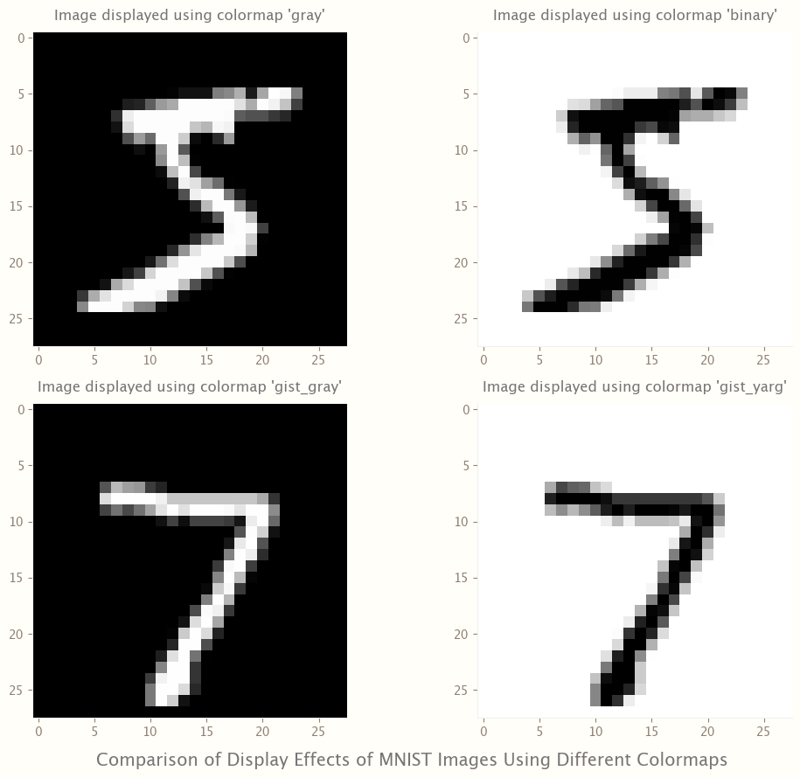

In [15]:
plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1])

fig, axs = plt.subplots(nrows=2, ncols=2)

# Data can be displayed as an image using `imshow`, but only on a 2D regular raster

image = train_data[0][0]
# Dates need to be reshaped into 2D arrays when displaying data using `imshow`

# The default matplotlib colormap is called 'viridis'
axs[0, 0].imshow(image.reshape((28, 28)), cmap="gray")
axs[0, 0].grid(False)
axs[0, 0].set_title("Image displayed using colormap 'gray'",
                    loc="center", pad=10)

axs[0, 1].imshow(image.reshape((28, 28)), cmap="binary")
axs[0, 1].grid(False)
axs[0, 1].set_title(
    "Image displayed using colormap 'binary'", loc="center", pad=10)

image = test_data[0][0]
# 'gist_gray' and 'gray' belong to the Sequential2 class of colormap, and they are
# almost identical to the naked eye, showing a monotonous gradient from black to white
axs[1, 0].imshow(image.reshape((28, 28)), cmap="gist_gray")
axs[1, 0].grid(False)
axs[1, 0].set_title(
    "Image displayed using colormap 'gist_gray'", loc="center", pad=10)

# 'gist_yarg' and 'binary' belong to the Sequential2 class of colormap, and they are
# almost identical to the naked eye, showing a monotonous gradient from white to black
axs[1, 1].imshow(image.reshape((28, 28)), cmap="gist_yarg")
axs[1, 1].grid(False)
axs[1, 1].set_title(
    "Image displayed using colormap 'gist_yarg'", loc="center", pad=10)

fig.suptitle(
    "Comparison of Display Effects of MNIST Images Using Different Colormaps",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

### <a id='toc5_1_2_'></a>[Batch Loading with Dataloader](#toc0_)


In [16]:
# Set a seed to control randomness, this will produce consistent results
torch.manual_seed(101)

# Sequential or shuffled batches of data will be automatically built according to the
# `shuffle` parameter of the `DataLoader`

# In order to better train the dataset, the training dataset needs to be shuffled
# during batch loading
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer("Configuration for batch loading")

statements = [
    """
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)
"""
]
tabulation.long_statement_generator(statements)

expressions = [
    "len(train_loader)",
    "len(train_loader.dataset)",
    "next(iter(train_loader))[0].shape",
    "len(test_loader)",
    "len(test_loader.dataset)",
    "next(iter(test_loader))[0].shape",
]
results = [
    str(len(train_loader)),
    str(len(train_loader.dataset)),
    str(next(iter(train_loader))[0].shape),
    str(len(test_loader)),
    str(len(test_loader.dataset)),
    str(next(iter(test_loader))[0].shape),
]
tabulation.expression_generator(expressions, results, 12)

Configuration for batch loading

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | torch.manual_seed(101)                                |
    |                                                       |
    | train_loader = DataLoader(train_data, batch_size=100, |
    |     shuffle=True)                                     |
    |                                                       |
    | test_loader = DataLoader(test_data, batch_size=500,   |
    |     shuffle=False)                                    |
    +-------------------------------------------------------+
    +-----------------------------------+-------------------------+
    | Expression                        | Result                  |
    +-----------------------------------+-------------------------+
    | len(train_loader)                 | 600                     |
    | len(tra

In [17]:
# This is a way to grab the first batch of images in a loop

# If the loop continues, this loop will be executed a total of 60000 / 100 = 600 times
for images, labels in train_loader:
    break

tabulation = Form_Generator()
tabulation.heading_printer("Grabbing the first batch of images")

statements = [
    """
for images, labels in train_loader:
    break
"""
]
tabulation.statement_generator(statements)

variables = ["images", "labels"]
values = [str(reprlib_rules.repr(images)), str(reprlib_rules.repr(labels))]
tabulation.variable_generator(variables, values)

expressions = ["images.shape", "labels.shape", "labels.numpy()"]
results = [
    str(images.shape),
    str(labels.shape),
    str(labels.numpy()),
]
tabulation.expression_generator(expressions, results, 3)

Grabbing the first batch of images

    +-------------------------------------+
    | Statement                           |
    +-------------------------------------+
    | for images, labels in train_loader: |
    |     break                           |
    +-------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | images   | tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0....       |
    |          |         [0., 0., 0.,  ..., 0., 0., 0.],          |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.]]]])     |
    | labels   | tensor([4, 1, 3, 4, 0, 4, 4, 1, 8, 1, 8, 3, 1,   |
    |          |    

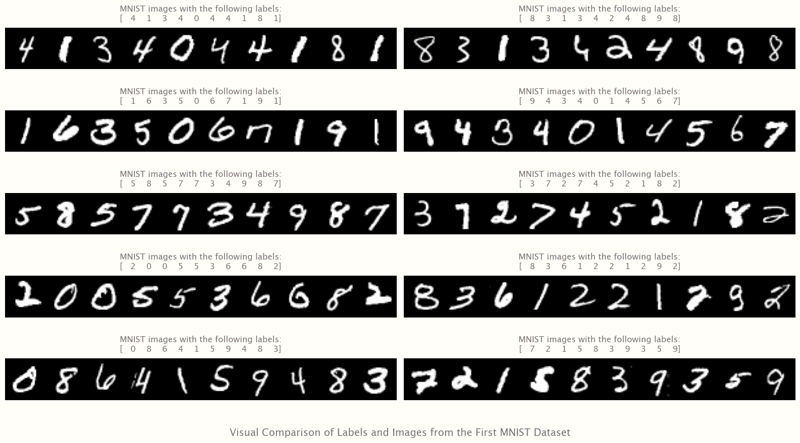

In [18]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(nrows=5, ncols=2)

for k in range(0, 100, 10):
    i = k // 20
    j = k % 20 // 10
    # `nrow` defines the number of images displayed in each row of the grid, the default value
    # is 8
    im = make_grid(images[k: k + 10], nrow=10)

    # Before displaying the image, the array needs to be transposed from CWH to WHC,
    # where C represents the channel, W represents the width, and H represents the height
    axs[i, j].imshow(np.transpose(im.numpy(), (1, 2, 0)))
    axs[i, j].set_title(
        f"MNIST images with the following labels:\n{str(labels[k:k+10].numpy())}",
        loc="center",
        pad=10,
    )

    axs[i, j].set(xticks=[], yticks=[], frame_on=False)
    axs[i, j].grid(False)

plt.suptitle(
    "Visual Comparison of Labels and Images from the First MNIST Dataset",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

## <a id='toc5_2_'></a>[ANN with MNIST - Part Two - Creating the Network](#toc0_)

### <a id='toc5_2_1_'></a>[Model Building](#toc0_)


In [19]:
class MultilayerPerceptron(nn.Module):
    # The input size (`in_sz`) should be the product of the image length and width pixels,
    # which is 28 * 28 = 784

    # It is recommended to replace the mutable default parameter with None

    # So this definition can be rewritten as follows:
    # def __init__(self, in_sz=784, out_sz=10, layers=None):
    #     if layers is None:
    #         layers = [120, 84]
    #     super().__init__()
    #     self.fc1 = nn.Linear(in_sz, layers[0])
    #     self.fc2 = nn.Linear(layers[0], layers[1])
    #     self.fc3 = nn.Linear(layers[1], out_sz)
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):
        # Apply the Rectified Linear Unit (ReLU) function element-wise via `F.relu`

        # Both ReLU and softmax are activation functions, which can limit the explosion of
        # the value calculated by the neuron to the extreme value, so as to ensure that
        # the value is within a range

        # Recent research proves that ReLU performs well in almost all cases compared to
        # other activation functions, besides, tanh is another very commonly used
        # activation function
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        # Softmax gives the class score for each class, which is basically a probability
        # distribution, which in turn tells the neural network how confident it is of
        # a certain class as the actual output, so softmax is a common method for
        # multi-class classification activation function

        # Apply a softmax followed by a logarithm via `F.log_softmax`

        # `dim` here means a dimension along which `F.log_softmax` will be computed
        return F.log_softmax(X, dim=1)


model = MultilayerPerceptron()
model

tabulation = Form_Generator()
tabulation.heading_printer("Definition of the ANN model")

definitions = [
    """
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)


model = MultilayerPerceptron()
model
"""
]
tabulation.definition_generator(definitions)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

Definition of the ANN model

    +-----------------------------------------------------------+
    | Definition                                                |
    +-----------------------------------------------------------+
    | class MultilayerPerceptron(nn.Module):                    |
    |     def __init__(self, in_sz=784, out_sz=10, layers=[120, |
    |     84]):                                                 |
    |         super().__init__()                                |
    |         self.fc1 = nn.Linear(in_sz, layers[0])            |
    |         self.fc2 = nn.Linear(layers[0], layers[1])        |
    |         self.fc3 = nn.Linear(layers[1], out_sz)           |
    |                                                           |
    |     def forward(self, X):                                 |
    |         X = F.relu(self.fc1(X))                           |
    |         X = F.relu(self.fc2(X))                           |
    |         X = self.fc3(X)                  

In [20]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()


def count_parameters(model):
    # `named_parameters` returns an iterator over the module parameters, yielding
    # the name of the parameter and the parameter itself
    names = [n for (n, p) in model.named_parameters() if p.requires_grad]
    name = "total parameters"
    names.append(name)
    max_length = max(map(len, names))
    # `:<` returns left-aligned results within available space
    formatted_names = [f"{n:<{max_length}}" for n in names]

    # `numel` returns the total number of elements in the input tensor

    # `parameters` returns an iterator over the module parameters, typically passed to
    # the optimizer
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    params.append(sum(params))
    # `:>` returns right-aligned results within available space
    formatted_params = [f"{p:>{max_length}}" for p in params]

    for n, p in zip(formatted_names[:-1], formatted_params[:-1]):
        cprint((n + p).replace(" ", "."), font_color)
    cprint("_" * max_length * 2, font_color)
    cprint(
        (formatted_names[-1] + formatted_params[-1]).replace(" ", "."),
        font_color,
        end="\n\n",
    )

    return names, params


names, params = count_parameters(model)

dataframe = DataFrame_Generator("parameter name", "number")

for n, p in zip(names, params):
    dataframe.updater(n, p)

tabulation.heading_printer("Count of model parameters")

statements = [
    """
def count_parameters(model):
    names = [n for (n, p) in model.named_parameters() if p.requires_grad]
    name = "total parameters"
    names.append(name)
    max_length = max(map(len, names))
    formatted_names = [f"{n:<{max_length}}" for n in names]

    params = [p.numel() for p in model.parameters() if p.requires_grad]
    params.append(sum(params))
    formatted_params = [f"{p:>{max_length}}" for p in params]

    for n, p in zip(formatted_names[:-1], formatted_params[:-1]):
        cprint((n + p).replace(" ", "."), font_color)
    cprint("_" * max_length * 2, font_color)
    cprint(
        (formatted_names[-1] + formatted_params[-1]).replace(" ", "."),
        font_color,
        end="\n\n"
    )

    return names, params


names, params = count_parameters(model)
"""
]
tabulation.statement_generator(statements)

variables = ["names", "params"]
values = [str(names), str(params)]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

fc1.weight.................94080
fc1.bias.....................120
fc2.weight.................10080
fc2.bias......................84
fc3.weight...................840
fc3.bias......................10
________________________________
total.parameters..........105214

Count of model parameters

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | def count_parameters(model):                                |
    |     names = [n for (n, p) in model.named_parameters() if    |
    |     p.requires_grad]                                        |
    |     name = "total parameters"                               |
    |     names.append(name)                                      |
    |     max_length = max(map(len, names))                       |
    |     formatted_names = [f"{n:<{max_length}}" for n in names] |
    |                       

In [21]:
# Cross-entropy loss is also known as logarithmic loss, logistic loss or log loss, is
# a commonly used loss function in PyTorch for training classification models

# Cross-entropy loss measures the difference between predicted class probabilities and
# true class labels

# `nn.CrossEntropyLoss` has a parameter called `reduction` which specifies the reduction
# to apply to the output, the default value is 'mean'

# Logistic regression typically optimizes the log loss for all the observations on which
# it is trained, which is the same as optimizing the average cross-entropy in the sample
criterion = nn.CrossEntropyLoss()
# The Adam optimizer is an optimization technique for machine learning and deep learning,
# which belongs to the gradient descent algorithm

# The Adam optimizer is fast and very effective when dealing with large problems involving
# large amounts of data, because it requires less memory and is very efficient

# The Adam optimizer is a combination of momentum and root mean square propagation algorithms,
# which are gradient descent methods that outperform stochastic gradient descent when
# the model is complex (as in most cases of deep learning)

# The Adam optimizer is relatively easy to configure, and the default configuration parameters
# perform well on most problems
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Configuration settings specification for the training process"
)

statements = [
    """
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Configuration settings specification for the training process

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | criterion = nn.CrossEntropyLoss()                          |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.001) |
    +------------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | CrossEntropyLoss()        |
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     foreach

### <a id='toc5_2_2_'></a>[Flatten the Training Data](#toc0_)


In [22]:
# Since the `shuffle` parameter of `train_loader` was set to True before, the batches of
# images and labels acquired at this time are different from the last time
dataiter = iter(train_loader)
images, labels = next(dataiter)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Grabbing the first batch of images by another method")

statements = [
    """
dataiter = iter(train_loader)
images, labels = next(dataiter)
"""
]
tabulation.statement_generator(statements)

variables = ["images", "labels"]
values = [str(reprlib_rules.repr(images)), str(reprlib_rules.repr(labels))]
tabulation.variable_generator(variables, values)

expressions = ["images.shape", "labels.shape", "labels.numpy()"]
results = [
    str(images.shape),
    str(labels.shape),
    str(labels.numpy()),
]
tabulation.expression_generator(expressions, results, 3)

Grabbing the first batch of images by another method

    +---------------------------------+
    | Statement                       |
    +---------------------------------+
    | dataiter = iter(train_loader)   |
    | images, labels = next(dataiter) |
    +---------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | images   | tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0....       |
    |          |         [0., 0., 0.,  ..., 0., 0., 0.],          |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.],        |
    |          |           [0., 0., 0.,  ..., 0., 0., 0.]]]])     |
    | labels   | tensor([9, 2, 3, 1, 5, 9, 5, 3, 5, 5, 5, 2, 6,   |
    |          |         3

In [23]:
# Multi-layer perceptrons generally take one-dimensional vectors as input, so before
# feeding a two-dimensional image into the model, it needs to be flattened first
flattened_images = images.view(100, -1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Flattening images for multi-layer perceptron models")

statements = ["flattened_images = images.view(100, -1)"]
tabulation.statement_generator(statements)

variables = ["flattened_images"]
values = [str(reprlib_rules.repr(flattened_images))]
tabulation.variable_generator(variables, values)

expressions = [
    "flattened_images.shape",
    "images.view(100,-1)[0]",
    "images.view(100,-1)[0].shape",
]
results = [
    str(flattened_images.shape),
    str(reprlib_rules.repr(images.view(100, -1)[0])),
    str(images.view(100, -1)[0].shape),
]
tabulation.expression_generator(expressions, results, 3)

Flattening images for multi-layer perceptron models

    +-----------------------------------------+
    | Statement                               |
    +-----------------------------------------+
    | flattened_images = images.view(100, -1) |
    +-----------------------------------------+
    +------------------+------------------------------------------+
    | Variable         | Value                                    |
    +------------------+------------------------------------------+
    | flattened_images | tensor([[0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |    .....,                                |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.],  |
    |                  |         [0., 0., 0.,  ..., 0., 0., 0.]]) |
    +------------------+---

## <a id='toc5_3_'></a>[ANN with MNIST - Part Three - Training](#toc0_)


In [24]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

start_time = time.time()

# Experience from previous experiments showed that training for 10 epochs on this dataset
# is more than enough
epochs = 10
# Create four empty lists as trackers for model training and model validation for each epoch
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

dataframe = DataFrame_Generator(
    "epoch",
    "training loss",
    "validation loss",
    "training correct",
    "validation correct",
    "training accuracy (%)",
    "validation accuracy (%)",
)

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    # The `enumerate` function adds a counter to an iterable object and returns it as
    # an enumeration object, which can then be used directly in a loop or converted to
    # a list of tuples using the `list` function

    # For this case, the enumeration object is a counter and a 2-element tuple of images
    # and their labels

    # It should be noted that the `enumerate` function can set the index value from which
    # the counter starts, the default is 0

    # This is the phase of model training
    for b, (X_train, y_train) in enumerate(train_loader, 1):
        # According to the construction of this multi-layer perceptron model, the output size
        # of the model is 10, which means that the output layer has 10 neurons

        # For each image, the result should be a list of 10 elements, where each element
        # represents the probability distribution of the image for each of the 10 neurons
        y_pred = model(X_train.view(100, -1))
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        # `torch.max` returns the maximum value of all elements in the input tensor,
        # where `dim` represents the dimension to reduce

        # The output of `torch.max` is a tuple of two tensors, the maximum value and
        # the index of the maximum value

        # In this case, the result should be the label of the neuron with the highest
        # probability distribution in the 10-element list

        # Both `y_pred` and `y_pred.data` are tensors, the difference is that the former
        # is a tensor that requires gradients, while the latter is not
        predicted = torch.max(y_pred.data, dim=1)[1]
        # This equality comparison returns true or false, essentially zero or one
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        # Print updated loss and accuracy after every 200 batches
        if b % 200 == 0:
            cprint(
                f"epoch: {i+1:2}-{b//200} | batches: {b:3} [{100*b:5}/60000] | loss: "
                f"{trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 28, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 79,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    # This is the phase of model validation
    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_val = model(X_test.view(500, -1))

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

    dataframe.updater(
        i + 1,
        train_loss[i],
        valid_loss[i],
        train_correct[i],
        valid_correct[i],
        np.divide(train_correct[i], len(train_data)) * 100,
        np.divide(valid_correct[i], len(test_data)) * 100,
    )

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(79),
    font_color,
    end="\n\n",
)

tabulation.heading_printer(
    "Model training and validation for a specific number of epochs"
)

statements = [
    """
start_time = time.time()

epochs = 10
train_loss = []
valid_loss = []
train_correct = []
valid_correct = []

for i in range(epochs):
    trn_loss = 0
    val_loss = 0
    trn_corr = 0
    val_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader, 1):
        y_pred = model(X_train.view(100, -1))
        batch_loss = criterion(y_pred, y_train)
        trn_loss += batch_loss

        predicted = torch.max(y_pred.data, dim=1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        if b % 200 == 0:
            cprint(
                f"epoch: {i+1:2}-{b//200} | batches: {b:3} [{100*b:5}/60000] | loss: "
                f"{trn_loss.item()/b:10.8f} | accuracy: {trn_corr.item()/b:6.3f}%",
                font_color,
            )
            if b == len(train_loader) and i != epochs - 1:
                cprint(
                    "+".join(["-" * 12, "-" * 28, "-" * 18, "-" * 18]),
                    font_color,
                )
            elif b == len(train_loader):
                cprint(
                    "_" * 79,
                    font_color,
                )

    train_loss.append(trn_loss.item() / len(train_loader))
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_val = model(X_test.view(500, -1))

            batch_loss = criterion(y_val, y_test)
            val_loss += batch_loss

            predicted = torch.max(y_val.data, 1)[1]
            val_corr += (predicted == y_test).sum()

    valid_loss.append(val_loss.item() / len(test_loader))
    valid_correct.append(val_corr.item())

cprint(
    f"Duration: {time.time() - start_time:.1f} seconds".rjust(79),
    font_color,
    end="\n\n",
)
"""
]
tabulation.statement_generator(statements)

variables = ["epochs", "train_loss", "valid_loss",
             "train_correct", "valid_correct"]
values = [
    str(epochs),
    str(train_loss),
    str(valid_loss),
    str(train_correct),
    str(valid_correct),
]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

epoch:  1-1 | batches: 200 [20000/60000] | loss: 0.63004520 | accuracy: 83.180%
epoch:  1-2 | batches: 400 [40000/60000] | loss: 0.45415825 | accuracy: 87.545%
epoch:  1-3 | batches: 600 [60000/60000] | loss: 0.37724080 | accuracy: 89.522%
------------+----------------------------+------------------+------------------
epoch:  2-1 | batches: 200 [20000/60000] | loss: 0.18717125 | accuracy: 94.505%
epoch:  2-2 | batches: 400 [40000/60000] | loss: 0.17274914 | accuracy: 94.920%
epoch:  2-3 | batches: 600 [60000/60000] | loss: 0.16149129 | accuracy: 95.180%
------------+----------------------------+------------------+------------------
epoch:  3-1 | batches: 200 [20000/60000] | loss: 0.12094732 | accuracy: 96.420%
epoch:  3-2 | batches: 400 [40000/60000] | loss: 0.11530086 | accuracy: 96.570%
epoch:  3-3 | batches: 600 [60000/60000] | loss: 0.11166550 | accuracy: 96.662%
------------+----------------------------+------------------+------------------
epoch:  4-1 | batches: 200 [20000/60000]

## <a id='toc5_4_'></a>[ANN with MNIST - Part Four - Evaluation](#toc0_)

### <a id='toc5_4_1_'></a>[Plotting Loss and Accuracy Comparison Chart](#toc0_)


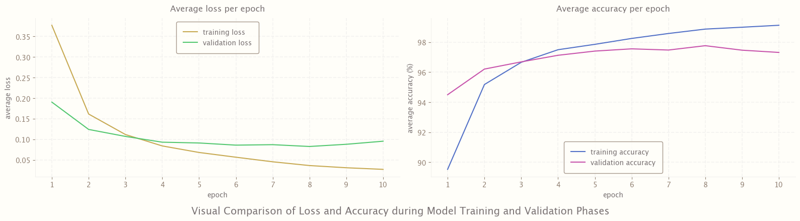

In [25]:
colors = calm_color_generator(4)

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(nrows=1, ncols=2)

x_ticks = list(range(10))

axs[0].plot(train_loss, label="training loss", c=colors.pop(0))
# The model cannot be expected to perform as well on the validation/test dataset as it does
# on the training dataset, since it will not adjust its weights and biases based on the
# validation/test dataset

# If the model is trained for more and more epochs, the model starts to overfit

# So it is important to look for epochs around this intersection, it helps to know how many
# epochs should really be trained, and then beyond that, the model will definitely overfit
# the training dataset as the validation results start to flatten out
axs[0].plot(valid_loss, label="validation loss", c=colors.pop(0))
axs[0].legend(loc="upper center", borderpad=1, ncol=1)
axs[0].set(
    xlabel="epoch",
    xticks=x_ticks,
    xticklabels=[x + 1 for x in x_ticks],
    ylabel="average loss",
)
axs[0].set_title("Average loss per epoch", loc="center", pad=10)

axs[1].plot(
    [t / 600 for t in train_correct], label="training accuracy", c=colors.pop(0)
)
axs[1].plot(
    [t / 100 for t in valid_correct], label="validation accuracy", c=colors.pop(0)
)
axs[1].legend(loc="lower center", borderpad=1, ncol=1)
axs[1].set(
    xlabel="epoch",
    xticks=x_ticks,
    xticklabels=[x + 1 for x in x_ticks],
    ylabel="average accuracy (%)",
)
axs[1].set_title("Average accuracy per epoch", loc="center", pad=10)

plt.suptitle(
    "Visual Comparison of Loss and Accuracy during Model Training and Validation Phases",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

### <a id='toc5_4_2_'></a>[Evaluation of Test Data](#toc0_)


In [26]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

# In order to evaluate this trained network model, a new, unseen dataset of images needs
# to be run, if not available, imagine extracting the test dataset as a new dataset at once
# instead of batch fetching and testing separately
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

# This process does not load any gradients, it just passes the data to the model without
# updating any weights and biases
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        # Process the image data as a flattened view
        y_tst = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    # This is the total accuracy on the test dataset
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n",
)

tabulation.heading_printer("Accuracy evaluation of test data")

statements = [
    """
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_tst = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_tst, 1)[1]
        correct += (predicted == y_test).sum()
cprint(
    f"Test accuracy: {correct.item()}/{len(test_data)} = "
    f"{correct.item()*100/(len(test_data)):6.3f}%",
    font_color,
    end="\n\n"
)
"""
]
tabulation.statement_generator(statements)

variables = ["X_test", "y_test", "y_tst", "predicted", "correct"]
values = [
    str(reprlib_rules.repr(X_test)),
    str(y_test),
    str(reprlib_rules.repr(y_tst)),
    str(predicted),
    str(correct),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(X_test)",
    "len(y_test)",
    "len(y_tst)",
    "len(predicted)",
    "correct.item()",
    "len(test_load_all)",
    "len(test_load_all.dataset)",
    "next(iter(test_load_all))[0].shape",
]
results = [
    str(len(X_test)),
    str(len(y_test)),
    str(len(y_tst)),
    str(len(predicted)),
    str(correct.item()),
    str(len(test_load_all)),
    str(len(test_load_all.dataset)),
    str(next(iter(test_load_all))[0].shape),
]
tabulation.expression_generator(expressions, results, 12)

Test accuracy: 9732/10000 = 97.320%

Accuracy evaluation of test data

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | test_load_all = DataLoader(test_data, batch_size=10000,    |
    |     shuffle=False)                                         |
    |                                                            |
    | with torch.no_grad():                                      |
    |     correct = 0                                            |
    |     for X_test, y_test in test_load_all:                   |
    |         y_tst = model(X_test.view(len(X_test), -1))        |
    |         predicted = torch.max(y_tst, 1)[1]                 |
    |         correct += (predicted == y_test).sum()             |
    | cprint(                                                    |
    |     f"Test accuracy: {correct.item()}/{len(test_data

In [27]:
tabulation = Form_Generator()
font_color = tabulation.get_font_color()

title = "Confusion Matrix"
cprint(title.center(53), font_color, attrs=["bold"])
cprint("[[" + "=" * 49 + "]]", font_color)
# `torch.stack` concatenates a sequence of tensors along a new dimension, this function
# has a parameter `dim` with a default value of 0, indicating the dimension to insert
stacked_tensor = torch.stack((y_test, predicted))
# `torch.unique` returns the unique elements of the input tensor, which by default are sorted
# in ascending order before being returned as output
labels = torch.unique(stacked_tensor)
cprint(labels.reshape(1, 10).numpy(), font_color)
cprint("[[" + "---|-" * 9 + "---|" + "]]", font_color)
# `confusion_matrix` calculates a confusion matrix to evaluate the accuracy of the
# classification, the function has a parameter `labels`, the default value is None
# indicating the list of labels used to index the matrix

# This means the list can be used to reorder or select a subset of labels, if None is given,
# labels that occur at least once in the ground truth or predicted target will be used in
# sorted order

# In this case, the ground truth and predicted targets do not need to be reshaped, but
# if their dimensions are greater than 1, they need to be reshaped into 1D arrays
cprint(confusion_matrix(y_test.view(-1), predicted.view(-1)), font_color)
cprint("[[" + "=" * 49 + "]]", font_color, end="\n\n")

tabulation.heading_printer("Printing of confusion matrix")

statements = [
    """
title = "Confusion Matrix"
cprint(title.center(53), font_color, attrs=["bold"])
cprint("[[" + "=" * 49 + "]]", font_color)
stacked_tensor = torch.stack((y_test, predicted))
labels = torch.unique(stacked_tensor)
cprint(labels.reshape(1, 10).numpy(), font_color)
cprint("[[" + "---|-" * 9 + "---|" + "]]", font_color)
cprint(confusion_matrix(y_test.view(-1), predicted.view(-1)), font_color)
cprint("[[" + "=" * 49 + "]]", font_color, end="\n\n")
"""
]
tabulation.statement_generator(statements)

variables = ["title", "stacked_tensor", "labels"]
values = [title, str(reprlib_rules.repr(stacked_tensor)), str(labels)]
tabulation.variable_generator(variables, values)

expressions = [
    "y_test.shape",
    "y_test.view(-1).shape",
    "predicted.shape",
    "predicted.view(-1).shape",
    "stacked_tensor.shape",
    "labels.shape",
]
results = [
    str(y_test.shape),
    str(y_test.view(-1).shape),
    str(predicted.shape),
    str(predicted.view(-1).shape),
    str(stacked_tensor.shape),
    str(labels.shape),
]
tabulation.expression_generator(expressions, results)

                   Confusion Matrix                  
[[=================================================]]
[[   0    1    2    3    4    5    6    7    8    9]]
[[---|----|----|----|----|----|----|----|----|----|]]
[[ 971    0    1    1    0    2    2    1    1    1]
 [   0 1127    2    1    0    0    2    0    3    0]
 [   4    0 1015    2    2    0    2    5    2    0]
 [   0    1    3  988    1    6    0    3    3    5]
 [   0    0    2    1  974    0    2    1    0    2]
 [   2    0    0    8    1  878    2    0    1    0]
 [   4    3    1    1    5    9  934    0    1    0]
 [   1    6   14    5    3    1    0  994    1    3]
 [   5    1    7   11    4   17    2    5  920    2]
 [   3    4    0   13   29   14    1   10    4  931]]
[[=================================================]]

Printing of confusion matrix

    +--------------------------------------------------------+
    | Statement                                              |
    +-------------------------------------

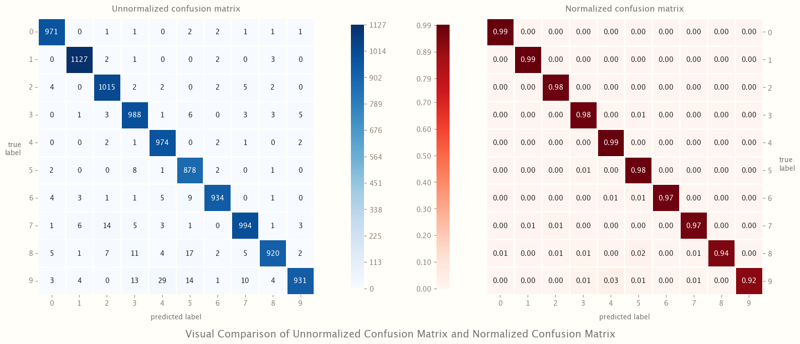

In [65]:
def plot_confusion_matrix(
    ax,
    y_true,
    y_pred,
    labels=None,
    title=None,
    normalize=None,
    cbar_kws=None,
    cmap="binary",
    cbar_location="right",
):
    if not labels:
        labels = torch.unique(torch.stack((y_true, y_pred)))

    if not title:
        if not normalize:
            title = "Unnormalized confusion matrix"
        else:
            title = "Normalized confusion matrix"

    # `confusion_matrix` has a parameter `normalize`, if it is None, the confusion matrix 
    # will not be normalized; otherwise the confusion matrix will be normalized on the 
    # true (row), predicted (column) condition, or all overall
    
    # The returns of `confusion_matrix` is a two-dimensional array, the entry in row i and 
    # column j represents the number of samples whose true label is class i and predicted label 
    # is class j
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    fmt = ".2f" if normalize else "d"
    y_position = "left" if cbar_location == "right" else "right"

    cbar_kws_0 = {
        "ticks": np.round(np.linspace(cm.min(), cm.max(), 11, endpoint=True), 2),
        "shrink": 0.8,
        "location": cbar_location,
        "pad": 0.1,
    }
    cbar_kws_0 if not cbar_kws else cbar_kws_0.update(cbar_kws)

    ax = sns.heatmap(
        cm,
        cmap=cmap,
        annot=True,
        fmt=fmt,
        annot_kws={"size": 10},
        linewidths=2,
        linecolor=custom_params["axes.facecolor"],
        cbar_kws=cbar_kws_0,
        square=True,
        ax=ax,
    )
    
    ax.set_title(title, loc="center", pad=10)
    ax.set_xlabel("predicted label", labelpad=10)
    ax.set_ylabel("true\nlabel", labelpad=10, rotation="horizontal", ha=cbar_location)
    ax.yaxis.set_label_position(y_position)
    ax.yaxis.set_ticks_position(y_position)
    ax.set_yticklabels(labels.numpy(), rotation=0)

    plt.box(False)
    plt.grid(False)
    
    return

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 5 * 4)

fig, axs = plt.subplots(nrows=1, ncols=2)

plot_confusion_matrix(axs[0], y_test, predicted, cmap="Blues")

plot_confusion_matrix(
    axs[1], y_test, predicted, cmap="Reds", normalize="true", cbar_location="left"
)

plt.suptitle(
    "Visual Comparison of Unnormalized Confusion Matrix and Normalized Confusion Matrix",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

# <a id='toc6_'></a>[Notebook Compression](#toc0_)


In [31]:
input_filename = "2 - CNN - Convolutional Neural Networks.ipynb"

output_filename = " (Compressed).".join(input_filename.split("."))

print(os.stat(input_filename).st_size)

# Keep the original file and create another compressed file to upload to GitHub by
# specifying the width of the output image
compress(
    input_filename, output_filename=output_filename, img_width=800, img_format="png"
)

print(os.stat(output_filename).st_size)

841053
639865
